# 3rd. Recommendation

### Here we use the top 5 Movie Studios to find the genres with the biggest ratings and mean ratings 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls

1st_Recommendation.ipynb  Options.ipynb             imdb.title.basics.csv
2nd_recommendaX.ipynb     Spread data               imdb.title.basics.csv.gz
2nd_recommendation.ipynb  Titles details.ipynb      imdb.title.ratings.csv.gz
3rd_recommendation.ipynb  Untitled.ipynb            main_data.ipynb
FIX gross.ipynb           bom.movie_gross.csv       mix data 1 y 2.ipynb
FIX movie titles.ipynb    bom.movie_gross.csv.gz    raiting_recom3.csv
Gross.ipynb               df_final_raiting.csv      raiting_recom3x.csv
Main_Data.csv             dgf1.csv                  spread_raiting.csv
Movie Ratings.ipynb       graph_genre.csv           top_studios.csv


In [3]:
#BRINGIN BACK DATAFRAME FROM FOLDER

df =  pd.read_csv("/Users/christopherfreyre/Documents/Academy Xi/Project_one/spread_raiting.csv")

In [4]:
df.head()

,Unnamed: 0,primary_title,genres,studio,domestic_gross,averagerating,year
0,1035,Black Panther,"Action,Adventure,Sci-Fi",BV,700100000.0,7.3,2018
1,2094,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,678800000.0,8.5,2018
2,4,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,652300000.0,7.0,2015
3,1602,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,620200000.0,7.1,2017
4,1943,Incredibles 2,"Action,Adventure,Animation",BV,608600000.0,7.7,2018


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      506 non-null    int64  
 1   primary_title   506 non-null    object 
 2   genres          505 non-null    object 
 3   studio          506 non-null    object 
 4   domestic_gross  505 non-null    float64
 5   averagerating   506 non-null    float64
 6   year            506 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.8+ KB


In [6]:
df.columns

Index(['Unnamed: 0', 'primary_title', 'genres', 'studio', 'domestic_gross',
       'averagerating', 'year'],
      dtype='object')

In [7]:
#DROPPING GENRES OLD COLUMN AS NO NEEDED

df.drop(columns = ['Unnamed: 0', 'primary_title', 'domestic_gross', 'studio'], inplace = True)
df

,genres,averagerating,year
0,"Action,Adventure,Sci-Fi",7.3,2018
1,"Action,Adventure,Sci-Fi",8.5,2018
2,"Action,Adventure,Sci-Fi",7.0,2015
3,"Action,Adventure,Fantasy",7.1,2017
4,"Action,Adventure,Animation",7.7,2018
...,...,...,...
501,Comedy,5.6,2017
502,"Action,Biography,Crime",6.3,2018
503,"Action,Drama,Thriller",6.4,2016
504,Documentary,8.7,2017


In [8]:
#STARTING DATAFRAME INDEX IN 1
df.index = df.index + 1
df

,genres,averagerating,year
1,"Action,Adventure,Sci-Fi",7.3,2018
2,"Action,Adventure,Sci-Fi",8.5,2018
3,"Action,Adventure,Sci-Fi",7.0,2015
4,"Action,Adventure,Fantasy",7.1,2017
5,"Action,Adventure,Animation",7.7,2018
...,...,...,...
502,Comedy,5.6,2017
503,"Action,Biography,Crime",6.3,2018
504,"Action,Drama,Thriller",6.4,2016
505,Documentary,8.7,2017


In [9]:
#MAKE A COPY OF DATA FRAME
df1 = df.copy()

In [10]:
#SPLITING GENRES INTO NEW COLUMNS

df1[['genre_1', 'genre_2', 'genre_3']] = df1['genres'].str.split(',' ,expand=True)
df1

,genres,averagerating,year,genre_1,genre_2,genre_3
1,"Action,Adventure,Sci-Fi",7.3,2018,Action,Adventure,Sci-Fi
2,"Action,Adventure,Sci-Fi",8.5,2018,Action,Adventure,Sci-Fi
3,"Action,Adventure,Sci-Fi",7.0,2015,Action,Adventure,Sci-Fi
4,"Action,Adventure,Fantasy",7.1,2017,Action,Adventure,Fantasy
5,"Action,Adventure,Animation",7.7,2018,Action,Adventure,Animation
...,...,...,...,...,...,...
502,Comedy,5.6,2017,Comedy,None,None
503,"Action,Biography,Crime",6.3,2018,Action,Biography,Crime
504,"Action,Drama,Thriller",6.4,2016,Action,Drama,Thriller
505,Documentary,8.7,2017,Documentary,None,None


In [11]:
#ORDER DATA BY YEAR
df1 = df1.sort_values(by=['year'], ascending = False)
df1

,genres,averagerating,year,genre_1,genre_2,genre_3
1,"Action,Adventure,Sci-Fi",7.3,2018,Action,Adventure,Sci-Fi
31,"Action,Adventure,Comedy",7.8,2018,Action,Adventure,Comedy
318,"Adventure,Comedy,Family",5.6,2018,Adventure,Comedy,Family
495,"Comedy,Drama",7.5,2018,Comedy,Drama,None
135,"Comedy,Musical,Romance",6.7,2018,Comedy,Musical,Romance
...,...,...,...,...,...,...
415,"Comedy,Family,Romance",5.8,2010,Comedy,Family,Romance
414,"Comedy,Romance",6.5,2010,Comedy,Romance,None
413,"Adventure,Comedy,Family",6.6,2010,Adventure,Comedy,Family
410,"Action,Crime,Thriller",6.6,2010,Action,Crime,Thriller


In [12]:
#DROPPING GENRES OLD COLUMN AS NO NEEDED

df1.drop(columns = ['genres'], inplace = True)
df1

,averagerating,year,genre_1,genre_2,genre_3
1,7.3,2018,Action,Adventure,Sci-Fi
31,7.8,2018,Action,Adventure,Comedy
318,5.6,2018,Adventure,Comedy,Family
495,7.5,2018,Comedy,Drama,None
135,6.7,2018,Comedy,Musical,Romance
...,...,...,...,...,...
415,5.8,2010,Comedy,Family,Romance
414,6.5,2010,Comedy,Romance,None
413,6.6,2010,Adventure,Comedy,Family
410,6.6,2010,Action,Crime,Thriller


In [13]:
#MAKE A COPY OF DATA FRAME
df2 = df1.copy()
df2

,averagerating,year,genre_1,genre_2,genre_3
1,7.3,2018,Action,Adventure,Sci-Fi
31,7.8,2018,Action,Adventure,Comedy
318,5.6,2018,Adventure,Comedy,Family
495,7.5,2018,Comedy,Drama,None
135,6.7,2018,Comedy,Musical,Romance
...,...,...,...,...,...
415,5.8,2010,Comedy,Family,Romance
414,6.5,2010,Comedy,Romance,None
413,6.6,2010,Adventure,Comedy,Family
410,6.6,2010,Action,Crime,Thriller


# Dataframe genre_1

In [14]:
#EXTRACTION OF RATING, YEAR AND GENRE_1
dg1 = df2.loc[:506, ["averagerating", "year", "genre_1"]]
dg1

,averagerating,year,genre_1
1,7.3,2018,Action
31,7.8,2018,Action
318,5.6,2018,Adventure
495,7.5,2018,Comedy
135,6.7,2018,Comedy
...,...,...,...
415,5.8,2010,Comedy
414,6.5,2010,Comedy
413,6.6,2010,Adventure
410,6.6,2010,Action


In [15]:
#CHANGING NAME OF COLUMN FROM GENRE_1 TO GENRES
dg1.rename(columns = {"genre_1":"genres"}, inplace = True)
dg1

,averagerating,year,genres
1,7.3,2018,Action
31,7.8,2018,Action
318,5.6,2018,Adventure
495,7.5,2018,Comedy
135,6.7,2018,Comedy
...,...,...,...
415,5.8,2010,Comedy
414,6.5,2010,Comedy
413,6.6,2010,Adventure
410,6.6,2010,Action


In [16]:
#CHECKING FOR NA ROWS IN DATAFRAME
dg1['genres'].isna().sum()

1

# Dataframe genre_2

In [17]:
#EXTRACTION OF RATING, YEAR AND GENRE_2
dg2 = df2.loc[:506, ["averagerating", "year", "genre_2"]]
dg2

,averagerating,year,genre_2
1,7.3,2018,Adventure
31,7.8,2018,Adventure
318,5.6,2018,Comedy
495,7.5,2018,Drama
135,6.7,2018,Musical
...,...,...,...
415,5.8,2010,Family
414,6.5,2010,Romance
413,6.6,2010,Comedy
410,6.6,2010,Crime


In [18]:
#CHANGING NAME OF COLUMN FROM GENRE_1 TO GENRES
dg2.rename(columns = {"genre_2":"genres"}, inplace = True)
dg2

,averagerating,year,genres
1,7.3,2018,Adventure
31,7.8,2018,Adventure
318,5.6,2018,Comedy
495,7.5,2018,Drama
135,6.7,2018,Musical
...,...,...,...
415,5.8,2010,Family
414,6.5,2010,Romance
413,6.6,2010,Comedy
410,6.6,2010,Crime


In [19]:
#CHECKING FOR NA ROWS IN DATAFRAME
dg2['genres'].isna().sum()

36

# Dataframe genre_3

In [20]:
#EXTRACTION OF RATING, YEAR AND GENRE_3
dg3 = df2.loc[:506, ["averagerating", "year", "genre_3"]]
dg3

,averagerating,year,genre_3
1,7.3,2018,Sci-Fi
31,7.8,2018,Comedy
318,5.6,2018,Family
495,7.5,2018,None
135,6.7,2018,Romance
...,...,...,...
415,5.8,2010,Romance
414,6.5,2010,None
413,6.6,2010,Family
410,6.6,2010,Thriller


In [21]:
#CHANGING NAME OF COLUMN FROM GENRE_1 TO GENRES
dg3.rename(columns = {"genre_3":"genres"}, inplace = True)
dg3

,averagerating,year,genres
1,7.3,2018,Sci-Fi
31,7.8,2018,Comedy
318,5.6,2018,Family
495,7.5,2018,None
135,6.7,2018,Romance
...,...,...,...
415,5.8,2010,Romance
414,6.5,2010,None
413,6.6,2010,Family
410,6.6,2010,Thriller


In [22]:
#CHECKING FOR NA ROWS IN DATAFRAME
dg3['genres'].isna().sum()

120


# Concationation of DataFrame_1, DataFrame_2 and DataFrame_3




In [23]:
#CONCATINATION OF DATAFRAME_1, DATAFRAME_2 AND DATAFRAME_3 
dgf = pd.concat([dg1, dg2, dg3], keys= ['dg1', 'dg2', 'dg3'])
dgf

averagerating  year     genres
dg1 1              7.3  2018     Action
    31             7.8  2018     Action
    318            5.6  2018  Adventure
    495            7.5  2018     Comedy
    135            6.7  2018     Comedy
...                ...   ...        ...
dg3 415            5.8  2010    Romance
    414            6.5  2010       None
    413            6.6  2010     Family
    410            6.6  2010   Thriller
    506            7.9  2010       None

[1518 rows x 3 columns]

In [24]:
dgf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1518 entries, ('dg1', 1) to ('dg3', 506)
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  1518 non-null   float64
 1   year           1518 non-null   int64  
 2   genres         1361 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 44.1+ KB


In [25]:
#CROSSTAB STUDIOS YEAR WITH DOMESTIC GROSS

dgf1 = pd.crosstab(dgf.genres,dgf.year, values = dgf.averagerating,
                     aggfunc = 'mean', margins = True, margins_name = 'Total').fillna(0) 





In [26]:
#NEW DATAFRAME WITH THE RATING MEAN OF EACH GENRE FOR EACH YEAR IN THE PERIOD OF 2010-2018 
#WITH A TOTAL RATING MEAN PER GENRE 
dgf1

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
genres,,,,,,,,,,
Action,6.291667,6.472222,6.395000,6.528571,7.061905,6.372727,6.507692,6.845000,6.659091,6.564948
Adventure,6.611111,6.329167,6.813333,6.441667,6.864706,6.445833,6.640741,6.520000,6.643478,6.569543
Animation,7.080000,6.000000,7.114286,6.562500,7.028571,6.300000,6.827273,5.950000,6.880000,6.603030
Biography,7.450000,7.100000,7.200000,7.250000,7.225000,7.314286,7.080000,7.333333,6.862500,7.161538
Comedy,6.010714,6.020000,6.481481,6.470000,6.395238,6.233333,6.530769,5.995652,6.810000,6.300000
Crime,6.512500,6.325000,6.733333,6.407692,6.672727,5.955556,6.925000,5.850000,6.850000,6.432812
Documentary,7.900000,7.600000,7.200000,0.000000,7.100000,7.300000,0.000000,7.950000,8.400000,7.611111
Drama,6.473684,6.765000,6.755556,6.695238,6.800000,6.373077,6.465217,6.606667,6.705882,6.612429
Family,5.892308,6.260000,6.537500,6.250000,6.450000,5.860000,6.566667,4.400000,6.116667,6.151923


In [27]:
#DELETING LAST ROW OF TOTAL PER YEAR AS WE WE DON'T NEED IT
#ONLY NEED TOTAL AS A COLUMN FOR TOTAL OF STUDIOS DOMESTIC GROSS IN PERIOD 2010-2018

dgf1 = dgf1.drop(dgf1.index[-1])

In [28]:
#CHECKING LAST ROW GONE
dgf1

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
genres,,,,,,,,,,
Action,6.291667,6.472222,6.395000,6.528571,7.061905,6.372727,6.507692,6.845000,6.659091,6.564948
Adventure,6.611111,6.329167,6.813333,6.441667,6.864706,6.445833,6.640741,6.520000,6.643478,6.569543
Animation,7.080000,6.000000,7.114286,6.562500,7.028571,6.300000,6.827273,5.950000,6.880000,6.603030
Biography,7.450000,7.100000,7.200000,7.250000,7.225000,7.314286,7.080000,7.333333,6.862500,7.161538
Comedy,6.010714,6.020000,6.481481,6.470000,6.395238,6.233333,6.530769,5.995652,6.810000,6.300000
Crime,6.512500,6.325000,6.733333,6.407692,6.672727,5.955556,6.925000,5.850000,6.850000,6.432812
Documentary,7.900000,7.600000,7.200000,0.000000,7.100000,7.300000,0.000000,7.950000,8.400000,7.611111
Drama,6.473684,6.765000,6.755556,6.695238,6.800000,6.373077,6.465217,6.606667,6.705882,6.612429
Family,5.892308,6.260000,6.537500,6.250000,6.450000,5.860000,6.566667,4.400000,6.116667,6.151923


In [29]:
#MAKING A COPY OF DATAFRAME 
raiting_recom3 = dgf1.copy()

In [30]:
#SAVING DATA FRAME AS A MAIN_DATA.CSV FILE

raiting_recom3.to_csv("/Users/christopherfreyre/Documents/Academy Xi/Project_one/raiting_recom3.csv")

In [31]:
#BRINGIN BACK DATAFRAME FROM FOLDER

raiting_recom3 =  pd.read_csv("/Users/christopherfreyre/Documents/Academy Xi/Project_one/raiting_recom3.csv")

In [32]:
#RATINGS ORDER BY TOTAL COLUMN AS MEAN RATING OF GENRES ACROSS THE PERIOD 2010-2018

raiting_recom3 = raiting_recom3.nlargest(n=21, columns=['Total']).reset_index(drop=True)
raiting_recom3.index = raiting_recom3.index + 1
raiting_recom3

,genres,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
1,Documentary,7.900000,7.600000,7.200000,0.000000,7.100000,7.300000,0.000000,7.950000,8.400000,7.611111
2,War,0.000000,7.200000,0.000000,7.600000,0.000000,7.100000,0.000000,0.000000,8.400000,7.575000
3,History,0.000000,7.200000,7.400000,0.000000,6.100000,7.375000,7.300000,7.550000,7.150000,7.233333
4,Biography,7.450000,7.100000,7.200000,7.250000,7.225000,7.314286,7.080000,7.333333,6.862500,7.161538
5,Musical,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,6.700000,7.150000
6,Sci-Fi,6.475000,6.714286,6.600000,7.000000,7.142857,6.857143,6.600000,6.800000,6.716667,6.796154
7,Drama,6.473684,6.765000,6.755556,6.695238,6.800000,6.373077,6.465217,6.606667,6.705882,6.612429
8,Sport,0.000000,7.600000,6.800000,6.300000,7.000000,7.400000,7.400000,2.900000,7.400000,6.609091
9,Animation,7.080000,6.000000,7.114286,6.562500,7.028571,6.300000,6.827273,5.950000,6.880000,6.603030
10,Adventure,6.611111,6.329167,6.813333,6.441667,6.864706,6.445833,6.640741,6.520000,6.643478,6.569543


In [33]:
#SWAPPING GENRRES ROW FOR YEAR COLUMNS TO ROWS
dgf1_t = dgf1.T
dgf1_t

genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,,
2010,6.291667,6.611111,7.080000,7.450000,6.010714,6.512500,7.900000,6.473684,5.892308,6.111111,...,5.600000,6.766667,0.00,6.000000,6.092857,6.475000,0.000000,6.240000,0.000,0.00
2011,6.472222,6.329167,6.000000,7.100000,6.020000,6.325000,7.600000,6.765000,6.260000,6.000000,...,5.500000,0.000000,0.00,6.450000,6.355556,6.714286,7.600000,6.725000,7.200,0.00
2012,6.395000,6.813333,7.114286,7.200000,6.481481,6.733333,7.200000,6.755556,6.537500,6.150000,...,5.380000,6.500000,0.00,6.466667,6.450000,6.600000,6.800000,6.420000,0.000,0.00
2013,6.528571,6.441667,6.562500,7.250000,6.470000,6.407692,0.000000,6.695238,6.250000,6.833333,...,5.700000,0.000000,0.00,8.100000,0.000000,7.000000,6.300000,6.272727,7.600,6.40
2014,7.061905,6.864706,7.028571,7.225000,6.395238,6.672727,7.100000,6.800000,6.450000,6.250000,...,4.750000,6.800000,0.00,6.214286,5.800000,7.142857,7.000000,6.275000,0.000,6.10
2015,6.372727,6.445833,6.300000,7.314286,6.233333,5.955556,7.300000,6.373077,5.860000,6.150000,...,5.800000,6.066667,0.00,5.950000,6.085714,6.857143,7.400000,6.030000,7.100,0.00
2016,6.507692,6.640741,6.827273,7.080000,6.530769,6.925000,0.000000,6.465217,6.566667,6.350000,...,6.133333,6.300000,0.00,6.350000,6.366667,6.600000,7.400000,6.433333,0.000,0.00
2017,6.845000,6.520000,5.950000,7.333333,5.995652,5.850000,7.950000,6.606667,4.400000,6.422222,...,6.750000,5.800000,7.60,6.825000,4.875000,6.800000,2.900000,6.314286,0.000,0.00
2018,6.659091,6.643478,6.880000,6.862500,6.810000,6.850000,8.400000,6.705882,6.116667,6.212500,...,5.625000,8.000000,6.70,5.900000,6.360000,6.716667,7.400000,5.785714,8.400,0.00


In [34]:
#MAKING A COPY OF DATAFRAME
df_final_raiting = dgf1_t.copy()

In [35]:
#SAVING DATA FRAME AS A MAIN_DATA.CSV FILE

df_final_raiting.to_csv("/Users/christopherfreyre/Documents/Academy Xi/Project_one/df_final_raiting.csv")

In [36]:
#BRINGIN BACK DATAFRAME FROM FOLDER

df_final_raiting =  pd.read_csv("/Users/christopherfreyre/Documents/Academy Xi/Project_one/df_final_raiting.csv")

In [37]:
#FINAL DATAFRAME USE FOR ALL GRAPH WITH RAITING PER YEAR AND GENRE
df_final_raiting

,year,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2010,6.291667,6.611111,7.080000,7.450000,6.010714,6.512500,7.900000,6.473684,5.892308,...,5.600000,6.766667,0.00,6.000000,6.092857,6.475000,0.000000,6.240000,0.000,0.00
1,2011,6.472222,6.329167,6.000000,7.100000,6.020000,6.325000,7.600000,6.765000,6.260000,...,5.500000,0.000000,0.00,6.450000,6.355556,6.714286,7.600000,6.725000,7.200,0.00
2,2012,6.395000,6.813333,7.114286,7.200000,6.481481,6.733333,7.200000,6.755556,6.537500,...,5.380000,6.500000,0.00,6.466667,6.450000,6.600000,6.800000,6.420000,0.000,0.00
3,2013,6.528571,6.441667,6.562500,7.250000,6.470000,6.407692,0.000000,6.695238,6.250000,...,5.700000,0.000000,0.00,8.100000,0.000000,7.000000,6.300000,6.272727,7.600,6.40
4,2014,7.061905,6.864706,7.028571,7.225000,6.395238,6.672727,7.100000,6.800000,6.450000,...,4.750000,6.800000,0.00,6.214286,5.800000,7.142857,7.000000,6.275000,0.000,6.10
5,2015,6.372727,6.445833,6.300000,7.314286,6.233333,5.955556,7.300000,6.373077,5.860000,...,5.800000,6.066667,0.00,5.950000,6.085714,6.857143,7.400000,6.030000,7.100,0.00
6,2016,6.507692,6.640741,6.827273,7.080000,6.530769,6.925000,0.000000,6.465217,6.566667,...,6.133333,6.300000,0.00,6.350000,6.366667,6.600000,7.400000,6.433333,0.000,0.00
7,2017,6.845000,6.520000,5.950000,7.333333,5.995652,5.850000,7.950000,6.606667,4.400000,...,6.750000,5.800000,7.60,6.825000,4.875000,6.800000,2.900000,6.314286,0.000,0.00
8,2018,6.659091,6.643478,6.880000,6.862500,6.810000,6.850000,8.400000,6.705882,6.116667,...,5.625000,8.000000,6.70,5.900000,6.360000,6.716667,7.400000,5.785714,8.400,0.00
9,Total,6.564948,6.569543,6.603030,7.161538,6.300000,6.432812,7.611111,6.612429,6.151923,...,5.693333,6.533333,7.15,6.362069,6.130189,6.796154,6.609091,6.268919,7.575,6.25


In [38]:
#CHECKING ALL COLUMNS OF DATAFRAME
df_final_raiting.columns

Index(['year', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

# First Graph

### All movie ratings per year of each genre in the period of 2010-2018 




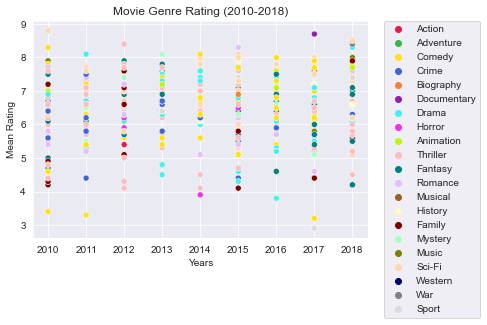

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



df = dgf

sns.set_style('darkgrid')


#Plotting chart and specifying colour values
sns.scatterplot(x='year', y='averagerating', hue='genres', data=df, 
                palette=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#dbdbdb']);

#Placing the legend outside of the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


#Labelling the chart
plt.title('Movie Genre Rating (2010-2018)')
plt.xlabel('Years')
plt.ylabel('Mean Rating')
plt.show()

# Second Graph

## Ratings mean per year of each genre in the period 2010-2018
### Highlight of each genre rating per year.



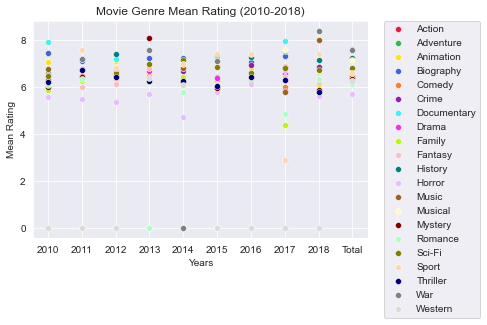

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = df_final_raiting



genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western']




sns.set_style('darkgrid')


sns.scatterplot(x='year', y='Action' , data=df, color= '#e6194b');
sns.scatterplot(x='year', y='Adventure', data=df, color= '#3cb44b');
sns.scatterplot(x='year', y='Animation', data=df, color= '#ffe119');
sns.scatterplot(x='year', y='Biography', data=df, color= '#4363d8');
sns.scatterplot(x='year', y='Comedy', data=df, color= '#f58231');
sns.scatterplot(x='year', y='Crime', data=df, color= '#911eb4');
sns.scatterplot(x='year', y='Documentary', data=df, color= '#46f0f0');
sns.scatterplot(x='year', y='Drama', data=df, color= '#f032e6');
sns.scatterplot(x='year', y='Family', data=df, color= '#bcf60c'); 
sns.scatterplot(x='year', y='Fantasy', data=df, color= '#fabebe');
sns.scatterplot(x='year', y='History', data=df, color= '#008080');
sns.scatterplot(x='year', y='Horror', data=df, color= '#e6beff');
sns.scatterplot(x='year', y='Music', data=df, color= '#9a6324');
sns.scatterplot(x='year', y='Musical', data=df, color= '#fffac8');
sns.scatterplot(x='year', y='Mystery', data=df, color= '#800000');
sns.scatterplot(x='year', y='Romance', data=df, color= '#aaffc3');
sns.scatterplot(x='year', y='Sci-Fi', data=df, color= '#808000');
sns.scatterplot(x='year', y='Sport', data=df, color= '#ffd8b1');
sns.scatterplot(x='year', y='Thriller', data=df, color= '#000075');
sns.scatterplot(x='year', y='War', data=df, color= '#808080');
sns.scatterplot(x='year', y='Western', data=df, color= '#dbdbdb');




plt.title('Movie Genre Mean Rating (2010-2018)')
plt.xlabel('Years')
plt.ylabel('Mean Rating')
plt.legend(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], loc='upper left', borderaxespad=0, bbox_to_anchor=(1.05, 1))
plt.show()

# Second Graph

### Ratings means per year of each genre in the period 2010-2018
### Highlighting the trajectory of each genre rating  per year.

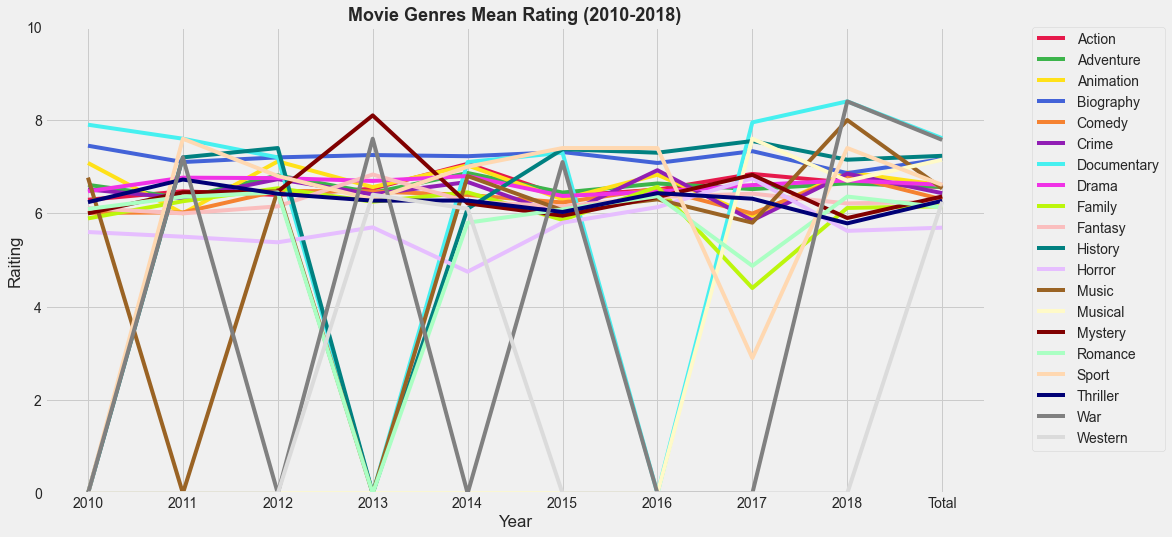

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams







data = df_final_raiting   
rcParams['figure.figsize'] = 15,8






genres = ['year','Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western']



plt.plot(data.year, data.Action, color= '#e6194b' )
plt.plot(data.year,data.Adventure, color= '#3cb44b')
plt.plot(data.year,data.Animation, color= '#ffe119' )
plt.plot(data.year,data.Biography, color= '#4363d8' )
plt.plot(data.year,data.Comedy, color= '#f58231')
plt.plot(data.year,data.Crime, color= '#911eb4')
plt.plot(data.year,data.Documentary, color= '#46f0f0')
plt.plot(data.year,data.Drama, color= '#f032e6')
plt.plot(data.year,data.Family, color= '#bcf60c' )
plt.plot(data.year,data.Fantasy, color= '#fabebe' )
plt.plot(data.year,data.History, color= '#008080')
plt.plot(data.year,data.Horror, color= '#e6beff')
plt.plot(data.year,data.Music, color= '#9a6324')
plt.plot(data.year,data.Musical, color= '#fffac8')
plt.plot(data.year,data.Mystery, color= '#800000')
plt.plot(data.year,data.Romance, color= '#aaffc3')       
plt.plot(data.year,data.Sport, color= '#ffd8b1')
plt.plot(data.year,data.Thriller, color= '#000075' )
plt.plot(data.year,data.War, color= '#808080')
plt.plot(data.year,data.Western, color= '#dbdbdb')



plt.grid(True)
plt.title('Movie Genres Mean Rating (2010-2018)', fontsize=18, fontweight= 'bold')


plt.xticks(data.year)
plt.ylim(0,10)
plt.style.use('fivethirtyeight')


plt.xlabel('Year')
plt.ylabel('Raiting')

plt.legend(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sport',
       'Thriller', 'War', 'Western'], loc='upper left', borderaxespad=0, bbox_to_anchor=(1.05, 1))

plt.show()